In [1]:
from evalutils import *
from lccv import *
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import ast

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

# Result Query
```sql
SELECT total, open, CONCAT(ROUND(100 * open / total, 2), "%") as "open (rel)", running, CONCAT(ROUND(100 * running / total, 2), "%") as "running (rel)", finished, CONCAT(ROUND(100 * finished / total, 2), "%") as "finished (rel)", successful, failed, CONCAT(ROUND(100 * successful / (successful + failed), 2), "%") as "success rate", CONCAT(ROUND(avgRuntimeFinished), "s") as "Average Time of Finished", CONCAT(ROUND(avgRuntimeFinished * open / running), "s") as "ETA" FROM (SELECT "aux" as pk, COUNT(*) as "open" FROM `lccollection` WHERE time_started is null) as t1 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as "running" FROM `lccollection` WHERE time_started is not null and time_end is null) as t2 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as finished, AVG(TIMESTAMPDIFF(SECOND, time_started, time_end)) as avgRuntimeFinished  FROM `lccollection` WHERE time_started is not null and time_end is not null) as t3 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as successful FROM `lccollection` where time_end is not null and exception is null) as t4 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as failed FROM `lccollection` where exception is not null) as t5 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as total FROM `lccollection`) as t6

```

In [10]:
X, y = get_dataset(1485)

In [3]:
def compute_empirical_model(learner, X, y, anchors = None, repeats = 1000):
    
    # compute anchors if not given
    if anchors is None:
        anchors = [2**x for x in range(6, int(np.log(len(X) * .9) / np.log(2) + 1))]
        anchors.append(int(len(X) * .9))
    
    # fill model
    elm = EmpiricalLearningModel(learner, X, y)
    for anchor in tqdm(anchors):
        print(anchor)
        for seed in tqdm(range(repeats)):
            elm.compute_and_add_sample(anchor, seed)
    return elm

model = compute_empirical_model(sklearn.tree.DecisionTreeClassifier(), X, y, anchors=[2**x for x in range(6, 9)], repeats = 100)

NameError: name 'X' is not defined

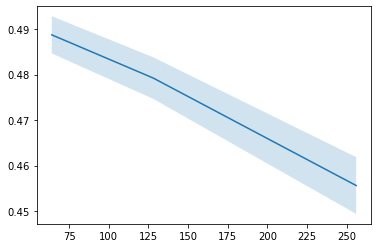

In [20]:
model.plot_model()

In [5]:
df = pd.read_csv("data/lccollection.csv", delimiter=";")
df[df["result"].notna()]

,experiment_id,openmlid,learner,seedindex,cpus,memory_max,time_created,host,executor,time_started,result,exception,time_end
0,1,1485,sklearn.svm.LinearSVC,0,4,16000,2021-04-30 20:30:48,node05-002,oculus-7289159-31,2021-05-06 17:53:34,"[{""errorrate"": 0.511171032357473, ""runtime"": 0...",NaN,2021-05-06 17:59:11
1,2,1485,sklearn.svm.LinearSVC,1,4,16000,2021-04-30 20:30:48,node01-008,oculus-7276074-3,2021-04-30 20:38:24,"[{""errorrate"": 0.4857473035439137, ""runtime"": ...",NaN,2021-04-30 20:44:43
2,3,1485,sklearn.tree.DecisionTreeClassifier,0,4,16000,2021-04-30 20:30:48,node05-009,oculus-7276178-9,2021-04-30 20:54:52,"[{""errorrate"": 0.5034668721109399, ""runtime"": ...",NaN,2021-04-30 20:56:30
3,4,1590,sklearn.svm.LinearSVC,0,4,16000,2021-04-30 20:30:48,node03-005,oculus-7276074-18,2021-04-30 20:38:24,"[{""errorrate"": 0.21150000000000002, ""runtime"":...",NaN,2021-04-30 20:41:58
4,5,1590,sklearn.svm.LinearSVC,1,4,16000,2021-04-30 20:30:48,node01-005,oculus-7276074-2,2021-04-30 20:38:24,"[{""errorrate"": 0.353, ""runtime"": 0.21137166023...",NaN,2021-04-30 20:41:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22775,22776,1049,sklearn.ensemble.GradientBoostingClassifier,19,4,16000,2021-04-30 20:30:48,node04-011,oculus-7285263-22,2021-05-06 11:18:41,[]\n,NaN,2021-05-06 11:18:44
22776,22777,31,sklearn.ensemble.RandomForestClassifier,19,4,16000,2021-04-30 20:30:48,node02-029,oculus-7285160-41,2021-05-06 11:10:31,"[{""errorrate"": 0.3012048192771084, ""runtime"": ...",NaN,2021-05-06 11:12:23
22777,22778,31,sklearn.ensemble.GradientBoostingClassifier,18,4,16000,2021-04-30 20:30:48,node09-025,oculus-7285109-26,2021-05-06 11:15:52,"[{""errorrate"": 0.3313253012048193, ""runtime"": ...",NaN,2021-05-06 11:16:45
22778,22779,40975,sklearn.ensemble.GradientBoostingClassifier,19,4,16000,2021-04-30 20:30:48,node09-025,oculus-7285109-26,2021-05-06 11:12:24,"[{""errorrate"": 0.5794663573085848, ""runtime"": ...",NaN,2021-05-06 11:15:52


In [6]:
rows = []
n = len(df[df["result"].notna()])
pbar = tqdm(total=n)
for i, row in df[df["result"].notna()].iterrows():
    batch_results = ast.literal_eval(row["result"])
    for r in batch_results:
        rows.append([row["openmlid"], row["learner"], r["seed"], r["trainsize"], r["errorrate"], int(np.round(r["runtime"]*1000))])

    pbar.update(1)
pbar.close()
dfResults = pd.DataFrame(rows, columns=["openmlid", "learner", "seed", "trainsize", "errorrate", "runtime"])
dfResults.to_csv("data/learningcurves_complete.csv")
dfResults

,openmlid,learner,seed,trainsize,errorrate,runtime
0,1485,sklearn.svm.LinearSVC,0,4,0.511171,24
1,1485,sklearn.svm.LinearSVC,0,8,0.493441,22
2,1485,sklearn.svm.LinearSVC,0,16,0.531347,33
3,1485,sklearn.svm.LinearSVC,0,32,0.462227,54
4,1485,sklearn.svm.LinearSVC,0,64,0.456625,96
...,...,...,...,...,...,...
7613681,31,sklearn.ensemble.GradientBoostingClassifier,999,64,0.308761,131
7613682,31,sklearn.ensemble.GradientBoostingClassifier,999,128,0.290138,137
7613683,31,sklearn.ensemble.GradientBoostingClassifier,999,256,0.293011,156
7613684,31,sklearn.ensemble.GradientBoostingClassifier,999,512,0.245902,182


No handles with labels found to put in legend.


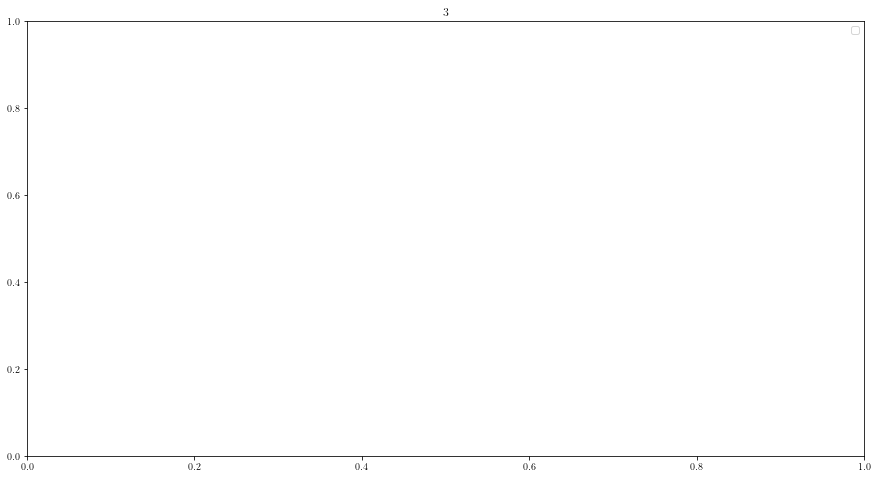

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Found non-convexity for sklearn.linear_model.RidgeClassifier at size 256 (compared to 128). [-0.00011403321639858995, -0.0004257510970227844]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.001311853369703268, -0.0018104689488623743]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 1800 (compared to 1024). [-5.60724332970765e-06, -9.207353427096374e-05]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 0589e215aa48b1eccf11b0c273c466b7.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.Perceptron at size 512 (compared to 256). [-6.497771251982865e-05, -0.00021577748370079242]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.00030065780130875824, -0.0005525096498021085]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.Perceptron'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/2be9c641af87af1cf0955ba1a14a421a.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 2be9c641af87af1cf0955ba1a14a421a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.Perceptron}
No pages of output.
Transcript written on 2be9c641af87af1cf0955ba1a14a421a.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


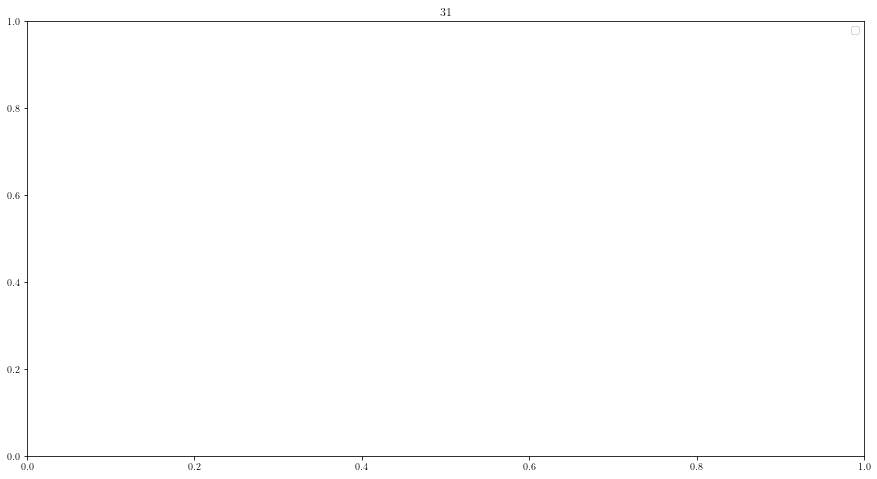

No handles with labels found to put in legend.


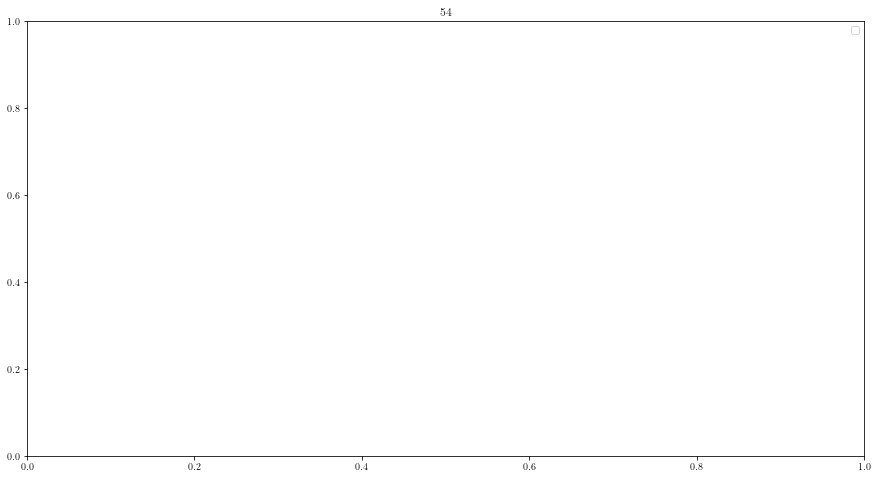

Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.00027808386473955095, -0.00045334361896180817]


RuntimeError: latex was not able to process the following string:
b'sklearn.neural_network.MLPClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/36fb6e96cff5c7606e057cd421be3d45.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 36fb6e96cff5c7606e057cd421be3d45.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.neural_
                               network.MLPClassifier}
No pages of output.
Transcript written on 36fb6e96cff5c7606e057cd421be3d45.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


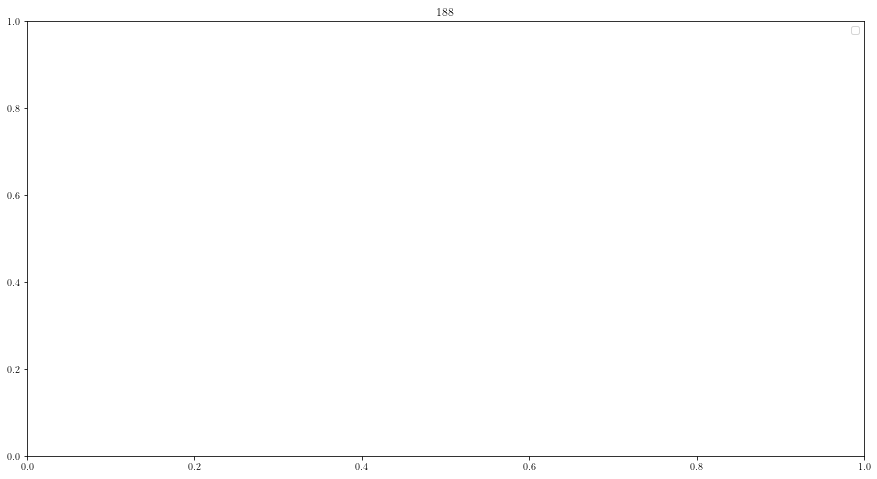

Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.000829809353941894, -0.0009483669476127244]


RuntimeError: latex was not able to process the following string:
b'sklearn.neural_network.MLPClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/36fb6e96cff5c7606e057cd421be3d45.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./36fb6e96cff5c7606e057cd421be3d45.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.neural_
                               network.MLPClassifier}
No pages of output.
Transcript written on 36fb6e96cff5c7606e057cd421be3d45.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


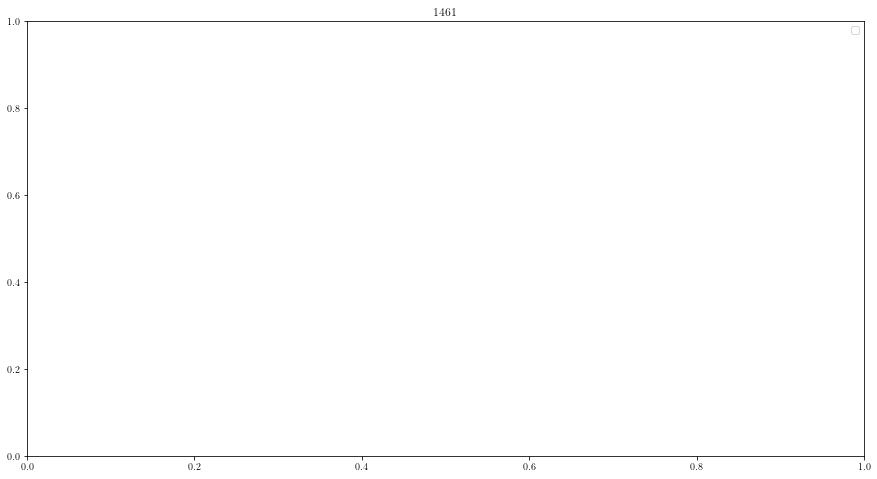

Found non-convexity for sklearn.linear_model.Perceptron at size 256 (compared to 128). [0.0003478875515879505, -0.000654708221581435]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.Perceptron'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/2be9c641af87af1cf0955ba1a14a421a.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./2be9c641af87af1cf0955ba1a14a421a.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.Perceptron}
No pages of output.
Transcript written on 2be9c641af87af1cf0955ba1a14a421a.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


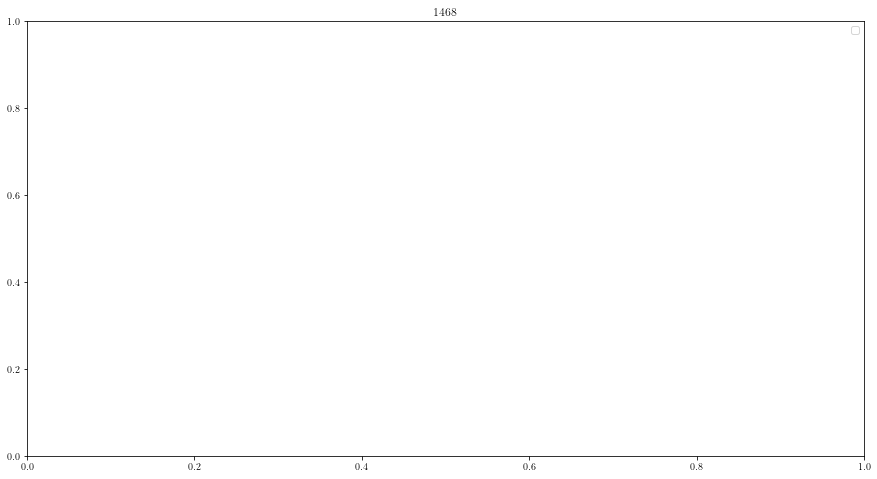

No handles with labels found to put in legend.


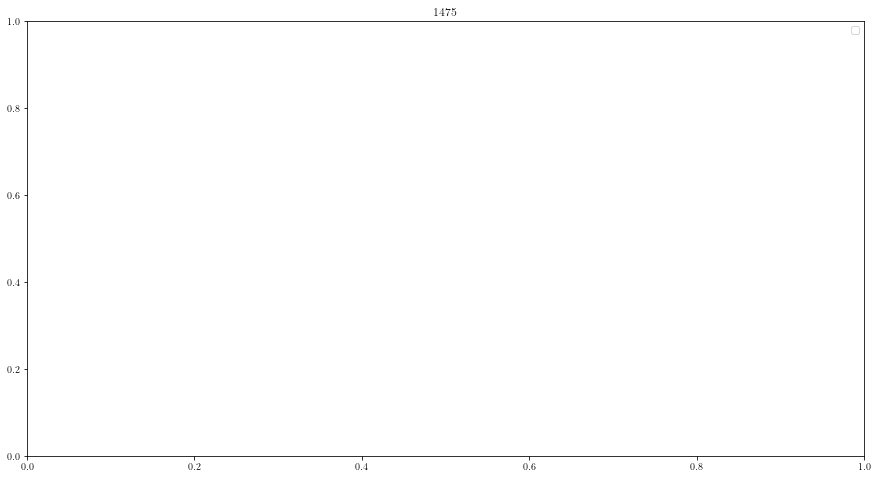

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 512 (compared to 256). [5.2835321408480334e-05, 4.080296249957282e-05]
Found non-convexity for sklearn.linear_model.RidgeClassifier at size 1024 (compared to 512). [4.080296249957282e-05, -5.306896606876532e-05]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./0589e215aa48b1eccf11b0c273c466b7.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


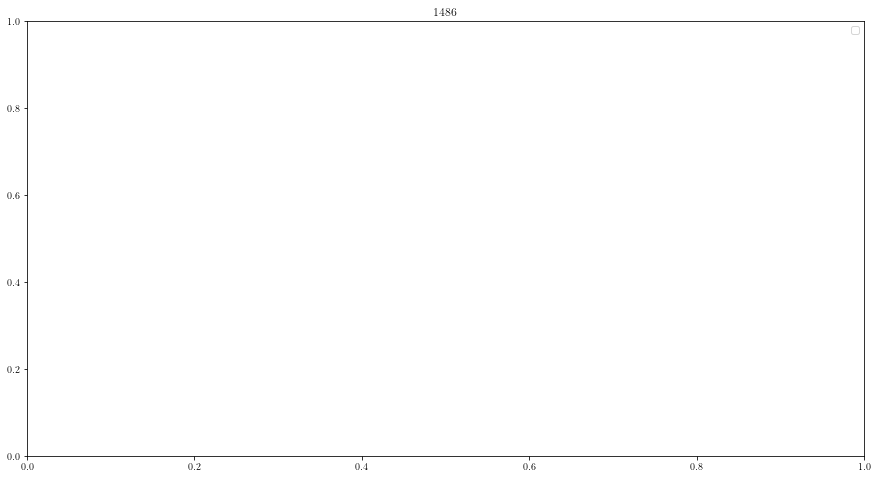

Found non-convexity for sklearn.linear_model.PassiveAggressiveClassifier at size 256 (compared to 128). [-9.524252950667976e-05, -0.0006700034202766591]
Found non-convexity for sklearn.linear_model.PassiveAggressiveClassifier at size 2280 (compared to 2048). [-7.18797614367802e-05, -0.00029154261391635476]
Found non-convexity for sklearn.linear_model.Perceptron at size 1024 (compared to 512). [-8.738829377935911e-05, -0.00015232482221491563]
Found non-convexity for sklearn.linear_model.Perceptron at size 2280 (compared to 2048). [-4.432222309773057e-05, -0.0001222926725307306]
Found non-convexity for sklearn.linear_model.SGDClassifier at size 2280 (compared to 2048). [-2.8597096592906075e-05, -0.00026305583973589166]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 2280 (compared to 2048). [-1.2312584686031226e-05, -9.11397735588807e-05]
Found non-convexity for sklearn.svm.LinearSVC at size 1024 (compared to 512). [-0.00011169137399217092, -0.00018403839475886733]
F

RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.PassiveAggressiveClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/6ca2a0243d9a3dd15e1b1cad1bf861bf.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 6ca2a0243d9a3dd15e1b1cad1bf861bf.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.PassiveAggressiveClassifier}
No pages of output.
Transcript written on 6ca2a0243d9a3dd15e1b1cad1bf861bf.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


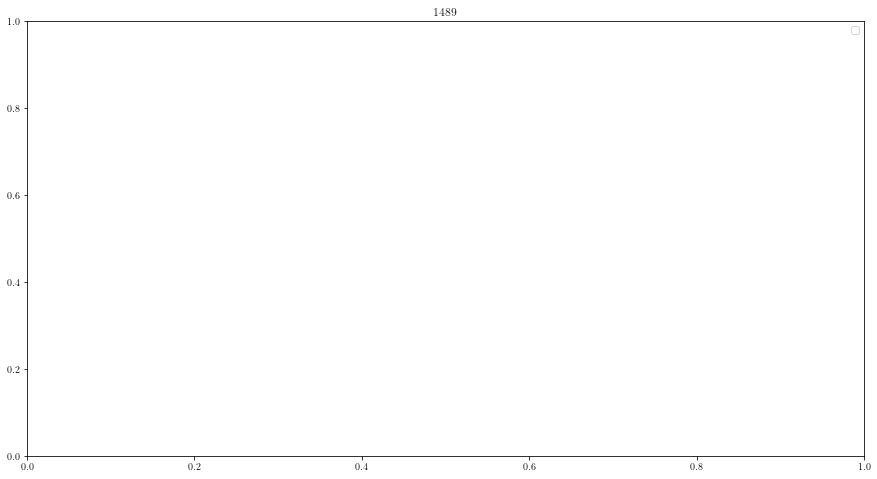

No handles with labels found to put in legend.


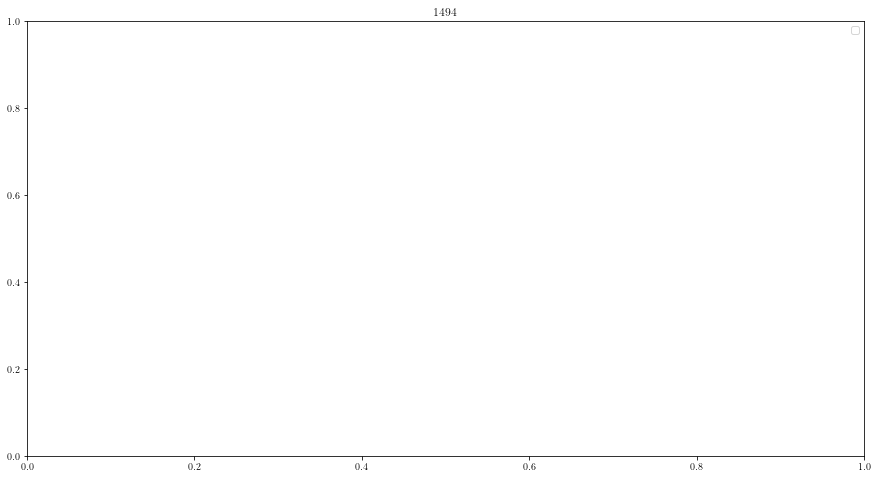

No handles with labels found to put in legend.


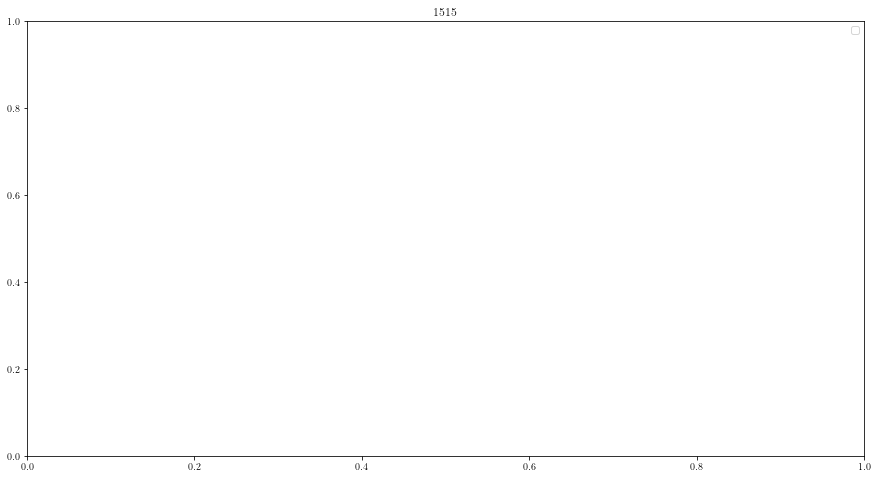

No handles with labels found to put in legend.


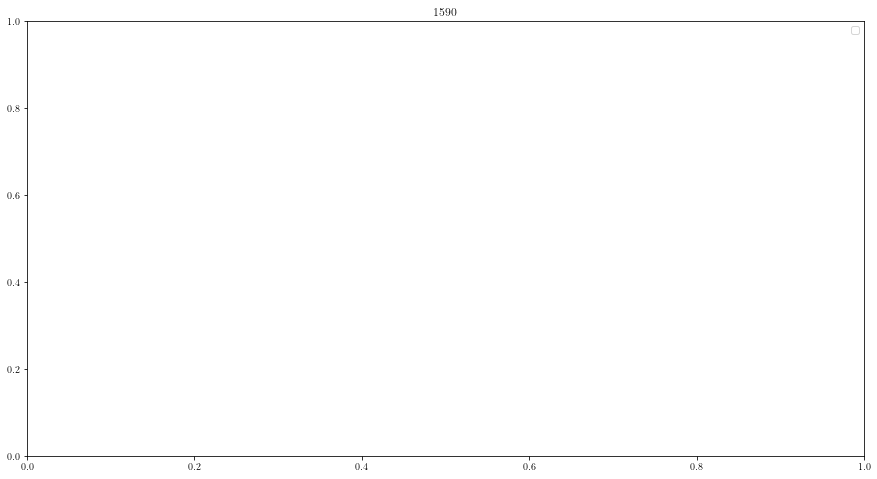

No handles with labels found to put in legend.


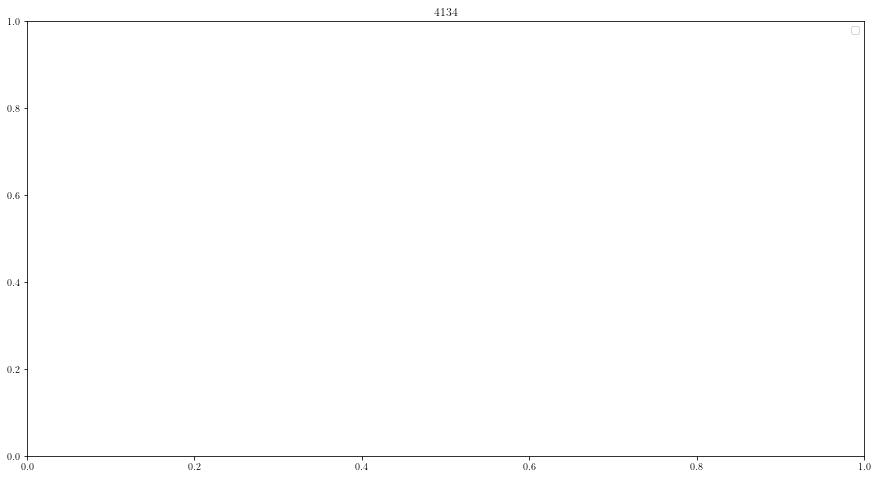

No handles with labels found to put in legend.


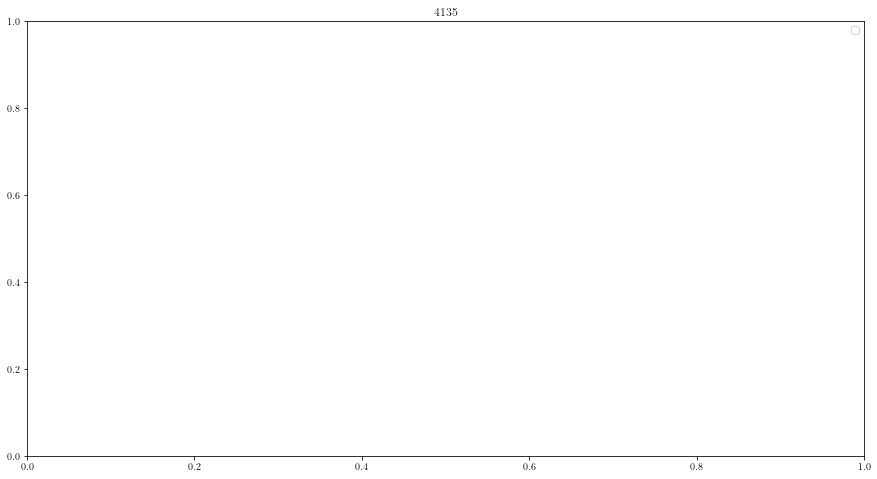

No handles with labels found to put in legend.


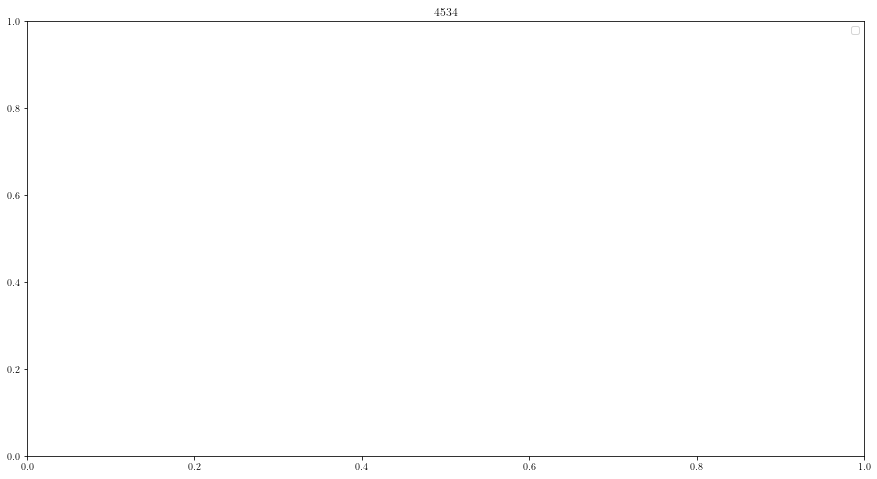

Found non-convexity for sklearn.linear_model.Perceptron at size 256 (compared to 128). [1.5914419608501276e-05, -0.00013789300948470213]
Found non-convexity for sklearn.linear_model.Perceptron at size 8885 (compared to 8192). [2.3046488710517593e-05, -0.00010573988359934777]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.00029502556783907175, -0.0005818047394978649]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.Perceptron'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/2be9c641af87af1cf0955ba1a14a421a.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./2be9c641af87af1cf0955ba1a14a421a.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.Perceptron}
No pages of output.
Transcript written on 2be9c641af87af1cf0955ba1a14a421a.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


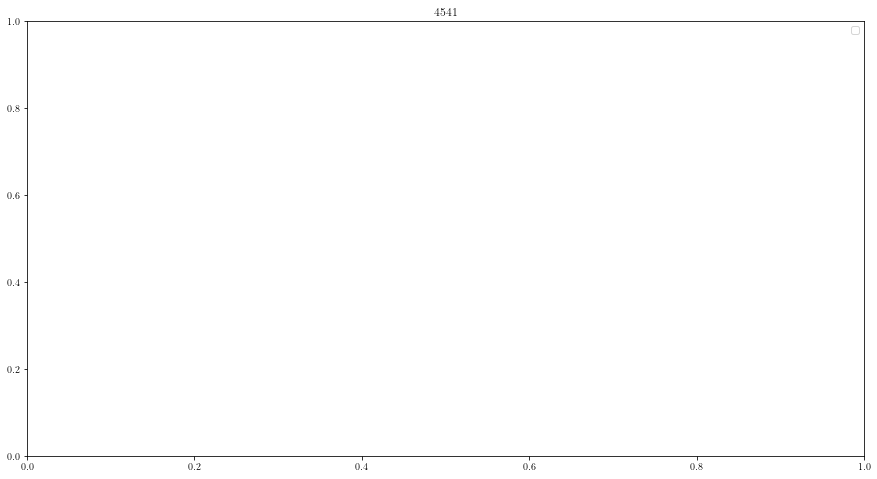

No handles with labels found to put in legend.


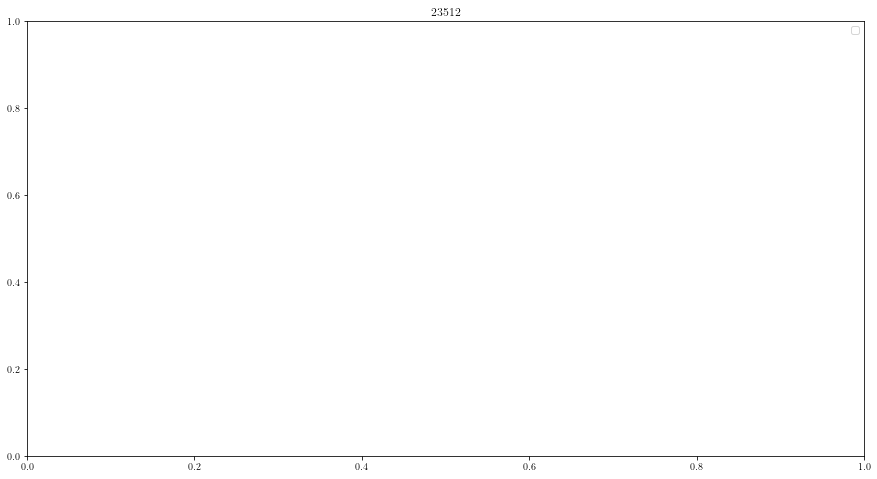

No handles with labels found to put in legend.


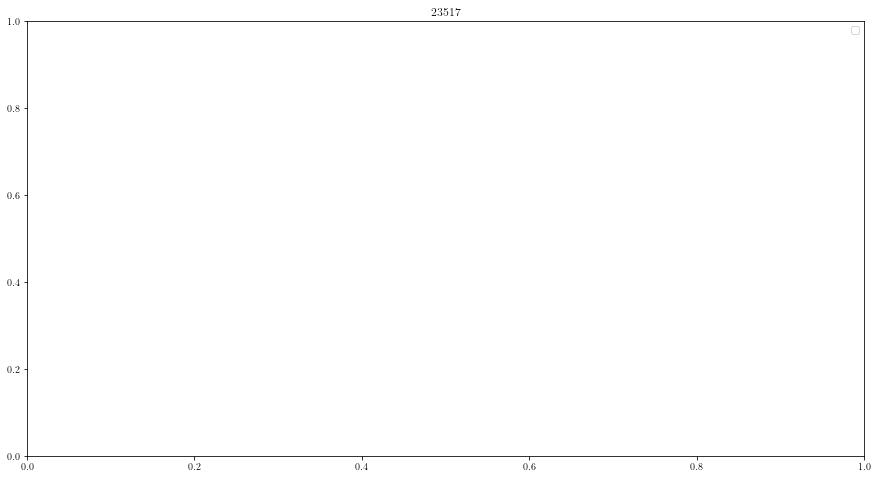

Found non-convexity for sklearn.linear_model.Perceptron at size 256 (compared to 128). [-0.00012934470751668758, -0.00023573077585970197]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.00022011884226515177, -0.0003023305166254854]
Found non-convexity for sklearn.svm.LinearSVC at size 4408 (compared to 4096). [-1.1537725695519134e-05, -6.289145295026964e-05]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.Perceptron'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/2be9c641af87af1cf0955ba1a14a421a.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./2be9c641af87af1cf0955ba1a14a421a.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.Perceptron}
No pages of output.
Transcript written on 2be9c641af87af1cf0955ba1a14a421a.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


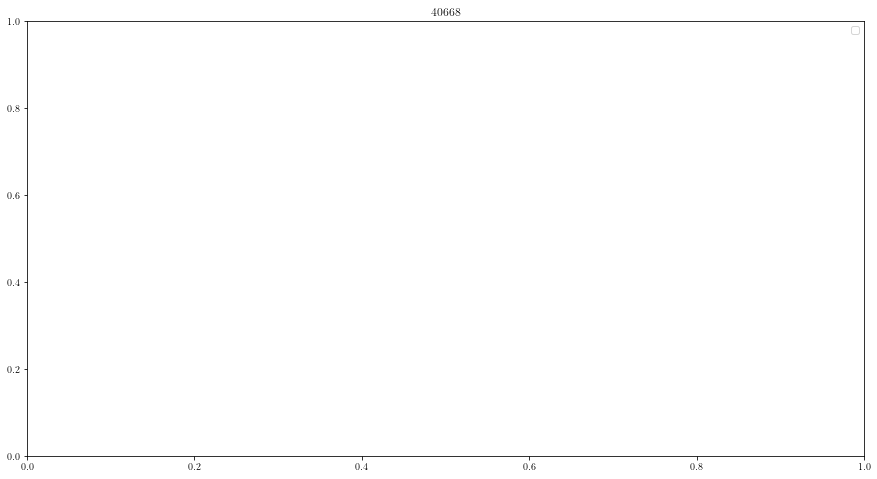

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 256 (compared to 128). [0.00032554922472685394, -0.00044083760760469564]
Found non-convexity for sklearn.linear_model.RidgeClassifier at size 512 (compared to 256). [-0.00044083760760469564, -0.00047797091578944155]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./0589e215aa48b1eccf11b0c273c466b7.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


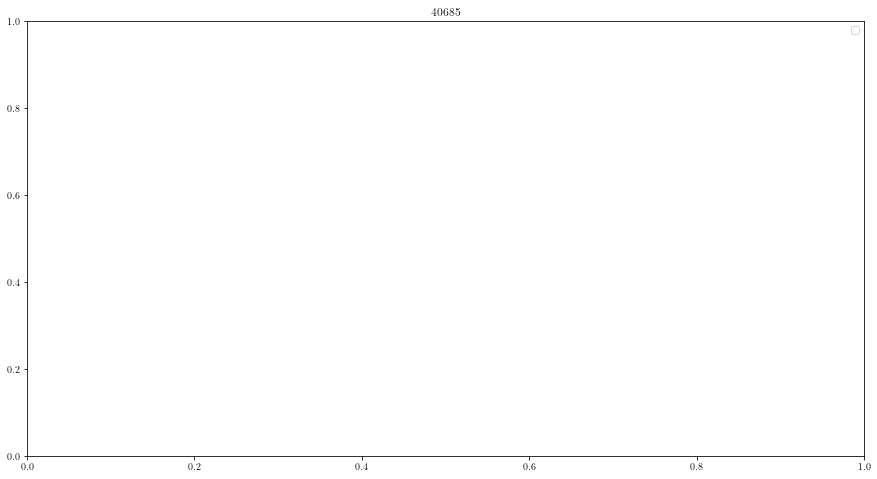

Found non-convexity for sklearn.linear_model.PassiveAggressiveClassifier at size 512 (compared to 256). [-0.00018572271343176173, -0.0002562742522204981]
Found non-convexity for sklearn.linear_model.Perceptron at size 4500 (compared to 4096). [-2.4014571177067548e-05, -7.981142352266418e-05]
Found non-convexity for sklearn.linear_model.SGDClassifier at size 4500 (compared to 4096). [-2.497295854996895e-05, -7.717405679593806e-05]
Found non-convexity for sklearn.svm.LinearSVC at size 4500 (compared to 4096). [-1.2919008469718094e-05, -0.0001341002294145905]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.PassiveAggressiveClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/6ca2a0243d9a3dd15e1b1cad1bf861bf.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./6ca2a0243d9a3dd15e1b1cad1bf861bf.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.PassiveAggressiveClassifier}
No pages of output.
Transcript written on 6ca2a0243d9a3dd15e1b1cad1bf861bf.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.Perceptron at size 256 (compared to 128). [-3.6164846941810725e-05, -7.168308066478481e-05]
Found non-convexity for sklearn.linear_model.Perceptron at size 4590 (compared to 4096). [-8.430859774309487e-06, -7.112457145019252e-05]
Found non-convexity for sklearn.linear_model.SGDClassifier at size 512 (compared to 256). [-2.2096759911439696e-05, -6.341543133557682e-05]
Found non-convexity for sklearn.svm.LinearSVC at size 4590 (compared to 4096). [-5.2921546031753e-06, -6.136502948590164e-05]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.Perceptron'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/2be9c641af87af1cf0955ba1a14a421a.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./2be9c641af87af1cf0955ba1a14a421a.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.Perceptron}
No pages of output.
Transcript written on 2be9c641af87af1cf0955ba1a14a421a.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


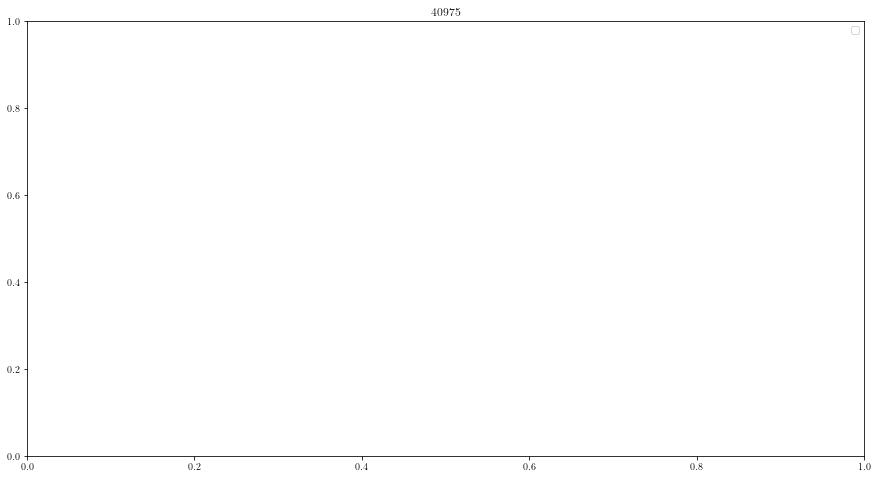

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 2951 (compared to 2048). [0.00020926989814396457, 0.00012846164144269818]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.00024320622484755848, -0.0002664139877041623]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./0589e215aa48b1eccf11b0c273c466b7.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.SGDClassifier at size 621 (compared to 512). [-0.00013929601162862852, -0.0002257203562284984]
Found non-convexity for sklearn.tree.ExtraTreeClassifier at size 621 (compared to 512). [-4.1674315769995446e-05, -5.080877576849587e-05]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.SGDClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/488f0d15f0e2270cc96d926c51582bb9.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 488f0d15f0e2270cc96d926c51582bb9.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.SGDClassifier}
No pages of output.
Transcript written on 488f0d15f0e2270cc96d926c51582bb9.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.Perceptron at size 512 (compared to 256). [8.403458343248828e-05, -3.629141195839701e-05]
Found non-convexity for sklearn.linear_model.Perceptron at size 1024 (compared to 512). [-3.629141195839701e-05, -0.00010346643999506054]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.0003334463744062797, -0.0006899208154226922]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.Perceptron'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/2be9c641af87af1cf0955ba1a14a421a.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./2be9c641af87af1cf0955ba1a14a421a.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.Perceptron}
No pages of output.
Transcript written on 2be9c641af87af1cf0955ba1a14a421a.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.PassiveAggressiveClassifier at size 4355 (compared to 4096). [-7.637432717312674e-06, -0.00012700374447061863]
Found non-convexity for sklearn.linear_model.Perceptron at size 512 (compared to 256). [7.313594113289926e-05, -0.00030877274522763776]
Found non-convexity for sklearn.linear_model.Perceptron at size 2048 (compared to 1024). [-3.191924853463264e-05, -7.255095497742867e-05]
Found non-convexity for sklearn.svm.LinearSVC at size 4355 (compared to 4096). [-4.777114089405391e-05, -0.00020453715755603866]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.PassiveAggressiveClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/6ca2a0243d9a3dd15e1b1cad1bf861bf.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./6ca2a0243d9a3dd15e1b1cad1bf861bf.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.PassiveAggressiveClassifier}
No pages of output.
Transcript written on 6ca2a0243d9a3dd15e1b1cad1bf861bf.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


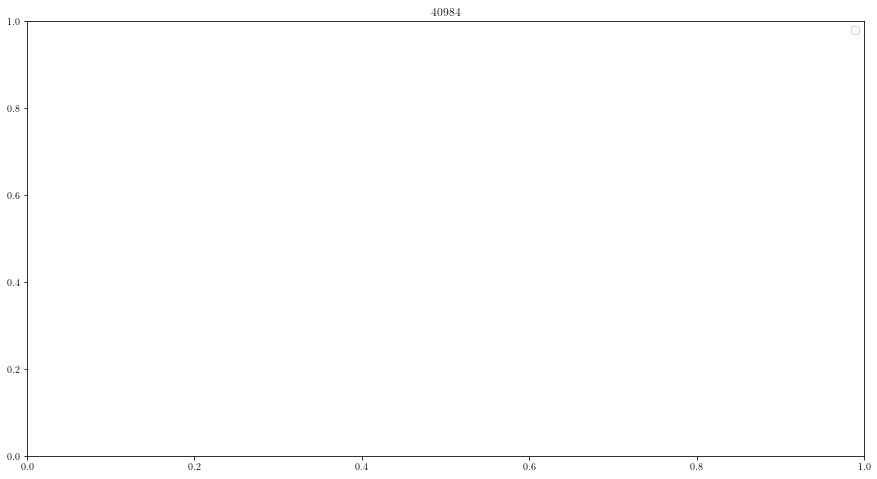

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 1024 (compared to 512). [0.0005181694368977562, -5.868036092216626e-05]
Found non-convexity for sklearn.linear_model.RidgeClassifier at size 2048 (compared to 1024). [-5.868036092216626e-05, -0.0002020126760635175]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./0589e215aa48b1eccf11b0c273c466b7.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


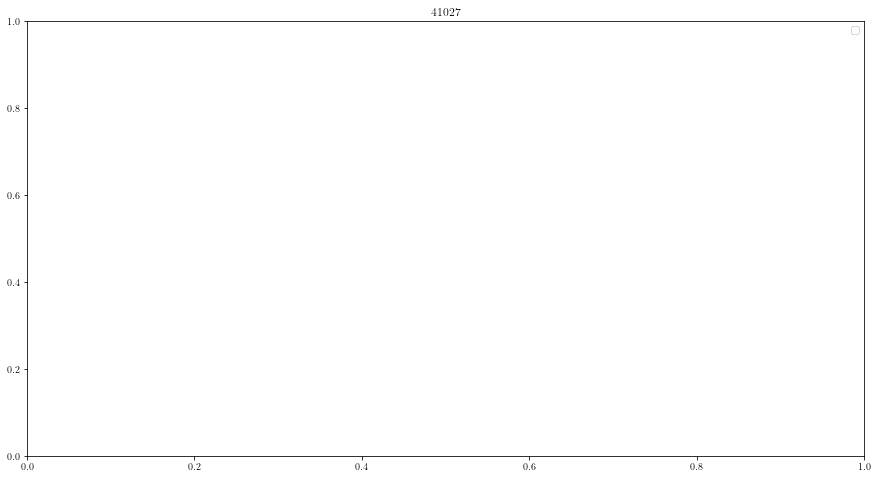

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 256 (compared to 128). [0.001329779259424982, -0.001141357499950335]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.00041170489961704073, -0.0004512812142974794]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./0589e215aa48b1eccf11b0c273c466b7.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 2048 (compared to 1024). [8.798411717646172e-05, -3.908922153719415e-05]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.00012102620156668673, -0.00023122648945939593]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./0589e215aa48b1eccf11b0c273c466b7.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 256 (compared to 128). [-0.0001746103100709875, -0.00032582472315655347]
Found non-convexity for sklearn.linear_model.SGDClassifier at size 512 (compared to 256). [-3.487516392670486e-05, -5.8100674676654336e-05]
Found non-convexity for sklearn.svm.LinearSVC at size 256 (compared to 128). [-2.769757522659219e-05, -6.282850932058312e-05]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./0589e215aa48b1eccf11b0c273c466b7.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 512 (compared to 256). [9.916395844247142e-05, -9.470742667300235e-05]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-2.4047413547704892e-05, -5.3927570232356614e-05]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./0589e215aa48b1eccf11b0c273c466b7.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 256 (compared to 128). [-2.005532630534792e-05, -0.0003782586755892415]
Found non-convexity for sklearn.svm.LinearSVC at size 256 (compared to 128). [-1.9149827747336375e-05, -8.940494806602885e-05]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.RidgeClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/0589e215aa48b1eccf11b0c273c466b7.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./0589e215aa48b1eccf11b0c273c466b7.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.RidgeClassifier}
No pages of output.
Transcript written on 0589e215aa48b1eccf11b0c273c466b7.log.




<Figure size 1080x576 with 1 Axes>

Found non-convexity for sklearn.linear_model.PassiveAggressiveClassifier at size 512 (compared to 256). [-0.00024459296611107793, -0.0003078244867299796]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.0005849604445906532, -0.000733163967627216]


RuntimeError: latex was not able to process the following string:
b'sklearn.linear_model.PassiveAggressiveClassifier'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/felix/.cache/matplotlib/tex.cache/6ca2a0243d9a3dd15e1b1cad1bf861bf.tex
LaTeX2e <2020-10-01> patch level 2
L3 programming layer <2020-12-03> xparse <2020-03-03>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./6ca2a0243d9a3dd15e1b1cad1bf861bf.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily sklearn.linear_
                               model.PassiveAggressiveClassifier}
No pages of output.
Transcript written on 6ca2a0243d9a3dd15e1b1cad1bf861bf.log.




<Figure size 1080x576 with 1 Axes>

No handles with labels found to put in legend.


KeyboardInterrupt: 

In [8]:
def plot_nonconvex_learning_curves(dfCache):
    
    algorithms = list(pd.unique(dfCache["learner"]))
    
    total_analyzed = 0
    total_convex = 0
    
    for openmlid, dfDataset in dfCache.groupby("openmlid"):
        fig, ax = plt.subplots(figsize=(15, 8))
        #print(pd.unique(dfCache["openmlid"]))
        for learner, dfLearner in dfDataset.groupby("learner"):
            
            is_convex = True
            sizes = [s for s in sorted(pd.unique(dfLearner["trainsize"])) if s >= 64]
            values = []
            conf = []
            optimistic_slopes = []
            for i, size in enumerate(sizes):
                
                if i > 1 and size < sizes[i-1] + 100: # ignore last small steps
                    continue
                    
                values_at_size = dfLearner[dfLearner["trainsize"] == size]["errorrate"].values
                values.append(np.mean(values_at_size))
                mu = np.mean(values_at_size)
                sigma = np.std(values_at_size)
                conf_at_size = scipy.stats.norm.interval(0.95, loc=mu, scale=sigma/np.sqrt(len(values_at_size)))
                conf.append(conf_at_size)

                if size >= 128:
                    optimistic_slope = (conf[i][0] - conf[i-1][1]) / (size - sizes[i-1])
                    optimistic_slopes.append(optimistic_slope)
                    
                    if len(optimistic_slopes) >= 2 and np.round(optimistic_slope, 4) < np.round(optimistic_slopes[-2], 4):
                        print("Found non-convexity for " + str(learner) + " at size " + str(size) + " (compared to " + str(sizes[i - 1]) + "). " + str(optimistic_slopes[-2:]))
                        is_convex = False
                    
            slope_orders = np.argsort(optimistic_slopes)
            #is_convex = all(slope_orders == list(range(len(optimistic_slopes))))
            
            if not is_convex:
                #print("Found non-convexity for " + str(learner) + " with slopes: " + str(optimistic_slopes))

                conf = np.array(conf)
                color = "C" + str(algorithms.index(learner))
                ax.plot(sizes, values, label=learner, color=color)
                ax.fill_between(sizes, conf[:,0], conf[:,1], alpha=0.2, color=color)
            else:
                total_convex += 1
            
            total_analyzed += 1
        ax.legend()
        ax.set_title(openmlid)
        ax.set_ylim([0, 1])
        plt.show()
    return total_convex/total_analyzed, total_convex, total_analyzed

plot_nonconvex_learning_curves(dfResults)

Creating 3 figures.
Found non-convexity for sklearn.linear_model.RidgeClassifier at size 256 (compared to 128). [-0.00011403321639858995, -0.0004257510970227844]
Found non-convexity for sklearn.linear_model.RidgeClassifier with slopes: [-0.00011403321639858995, -0.0004257510970227844, -0.0003836201721253742, -2.850389516781768e-05, -8.235381174317814e-06]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.001311853369703268, -0.0018104689488623743]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 1800 (compared to 1024). [-5.60724332970765e-06, -9.207353427096374e-05]
Found non-convexity for sklearn.neural_network.MLPClassifier with slopes: [-0.001311853369703268, -0.0018104689488623743, -0.00031043665398919904, -5.60724332970765e-06, -9.207353427096374e-05]
Found non-convexity for sklearn.linear_model.Perceptron at size 512 (compared to 256). [-6.497771251982865e-05, -0.00021577748370079242]
Found non-convexity for sklea

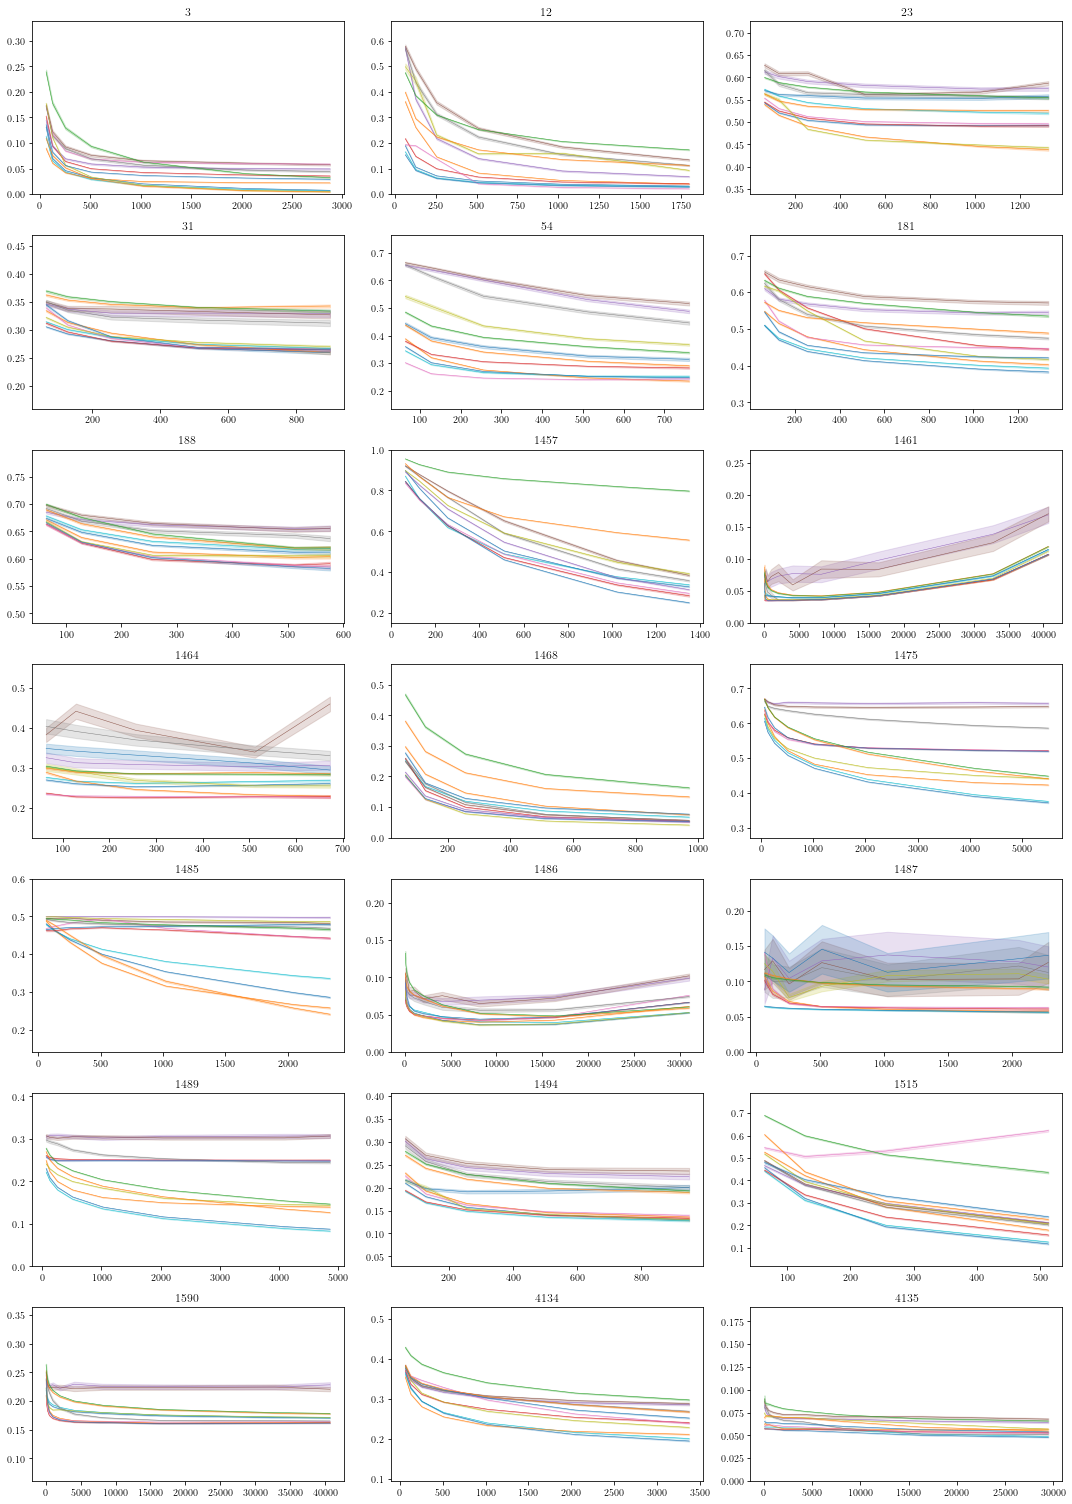

Found non-convexity for sklearn.linear_model.Perceptron at size 256 (compared to 128). [1.5914419608501276e-05, -0.00013789300948470213]
Found non-convexity for sklearn.linear_model.Perceptron at size 8885 (compared to 8192). [2.3046488710517593e-05, -0.00010573988359934777]
Found non-convexity for sklearn.linear_model.Perceptron with slopes: [1.5914419608501276e-05, -0.00013789300948470213, -0.00013330141807917258, -9.261049904531649e-05, -4.040576576678752e-05, -1.7912301102554972e-05, 2.3046488710517593e-05, -0.00010573988359934777]
Found non-convexity for sklearn.neural_network.MLPClassifier at size 256 (compared to 128). [-0.00029502556783907175, -0.0005818047394978649]
Found non-convexity for sklearn.neural_network.MLPClassifier with slopes: [-0.00029502556783907175, -0.0005818047394978649, -0.0001590262537793101, -2.6762285731737586e-05, -1.596170455536326e-05, -7.480629640859392e-06, -4.702992074024151e-06, -5.489614307103198e-06]
Found non-convexity for sklearn.linear_model.Pe

Found non-convexity for sklearn.ensemble.ExtraTreesClassifier at size 2079 (compared to 2048). [-1.3789485084555287e-05, -6.711215966281433e-05]
Found non-convexity for sklearn.ensemble.ExtraTreesClassifier with slopes: [-0.0008122903327648103, -0.0003013086534027423, -0.0001022686602944918, -3.727196760925763e-05, -1.3789485084555287e-05, -6.711215966281433e-05]
Found non-convexity for sklearn.ensemble.GradientBoostingClassifier at size 2079 (compared to 2048). [-1.2351248188596998e-05, -6.485324479776676e-05]
Found non-convexity for sklearn.ensemble.GradientBoostingClassifier with slopes: [-0.0011170490133253041, -0.0003470828826767971, -0.00010292941423016734, -3.39255655646553e-05, -1.2351248188596998e-05, -6.485324479776676e-05]
Found non-convexity for sklearn.ensemble.RandomForestClassifier at size 2079 (compared to 2048). [-1.531493718972563e-05, -6.19566420072772e-05]
Found non-convexity for sklearn.ensemble.RandomForestClassifier with slopes: [-0.0008327761074571412, -0.000257

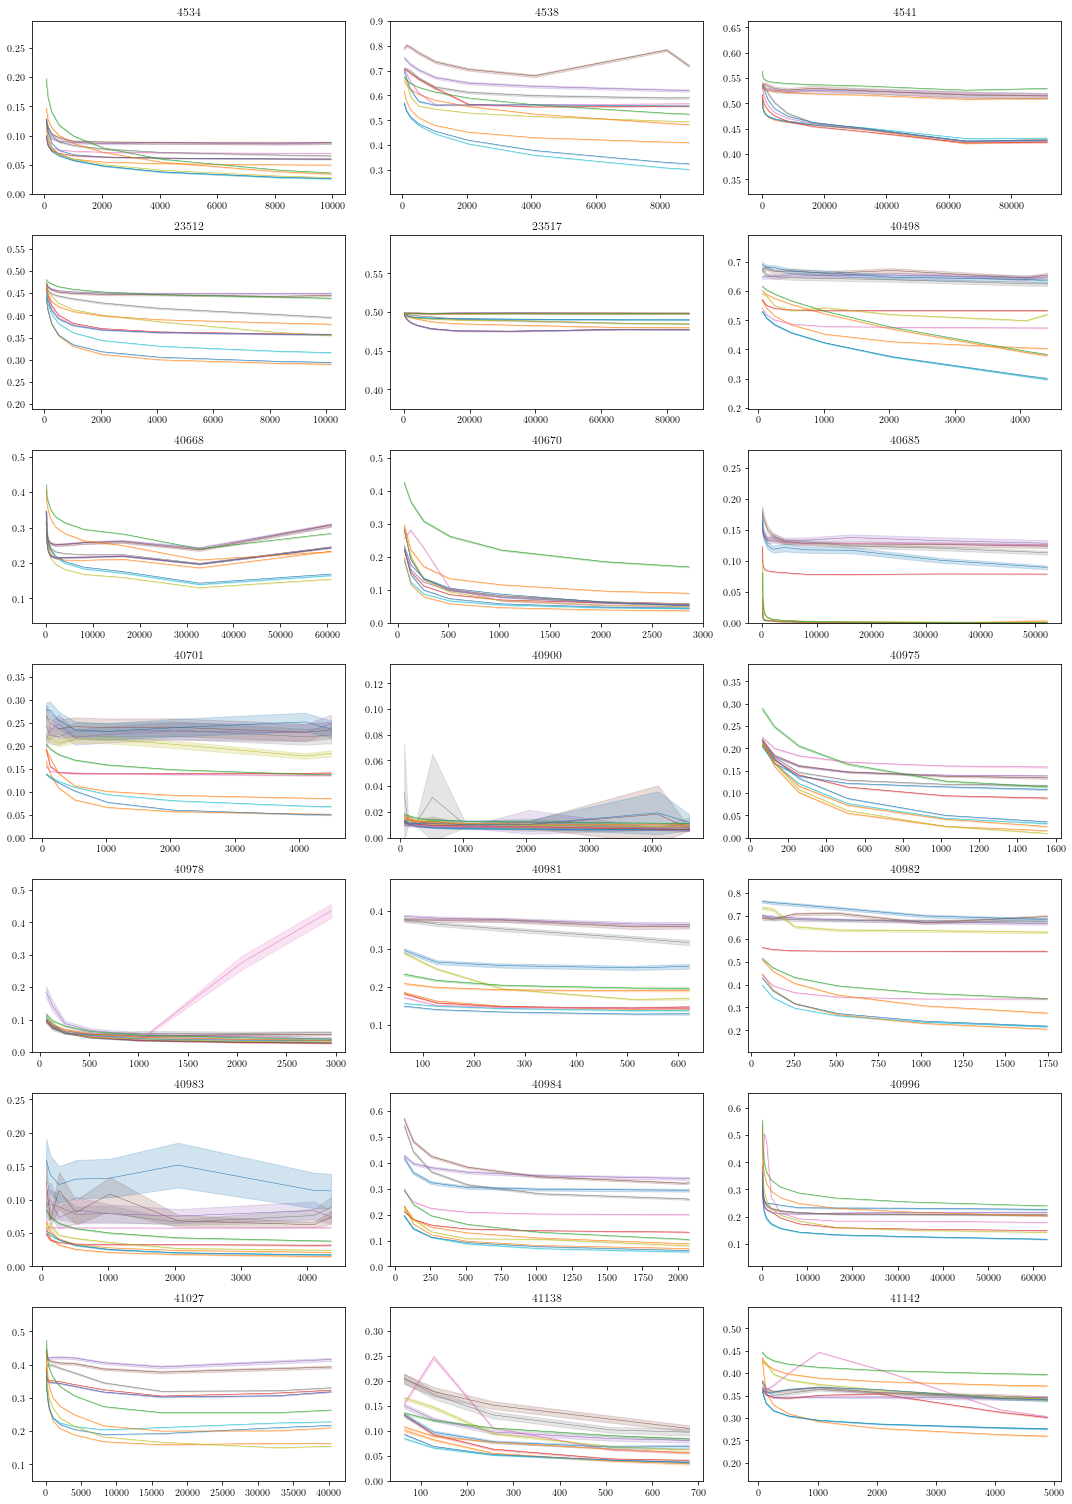

Found non-convexity for sklearn.linear_model.RidgeClassifier at size 256 (compared to 128). [-0.0001746103100709875, -0.00032582472315655347]
Found non-convexity for sklearn.linear_model.RidgeClassifier with slopes: [-0.0001746103100709875, -0.00032582472315655347, -0.00013656085476086027, -4.392466392897271e-05, -1.2336063962744198e-05, -6.791573551474037e-06]
Found non-convexity for sklearn.linear_model.SGDClassifier at size 512 (compared to 256). [-3.487516392670486e-05, -5.8100674676654336e-05]
Found non-convexity for sklearn.linear_model.SGDClassifier with slopes: [-2.5581270148271155e-05, -3.487516392670486e-05, -5.8100674676654336e-05, -3.103098476457092e-05, -1.9289069965297415e-05, -1.3864946508173435e-05]
Found non-convexity for sklearn.svm.LinearSVC at size 256 (compared to 128). [-2.769757522659219e-05, -6.282850932058312e-05]
Found non-convexity for sklearn.svm.LinearSVC with slopes: [-2.769757522659219e-05, -6.282850932058312e-05, -0.00012629041371421527, -6.4873644390595

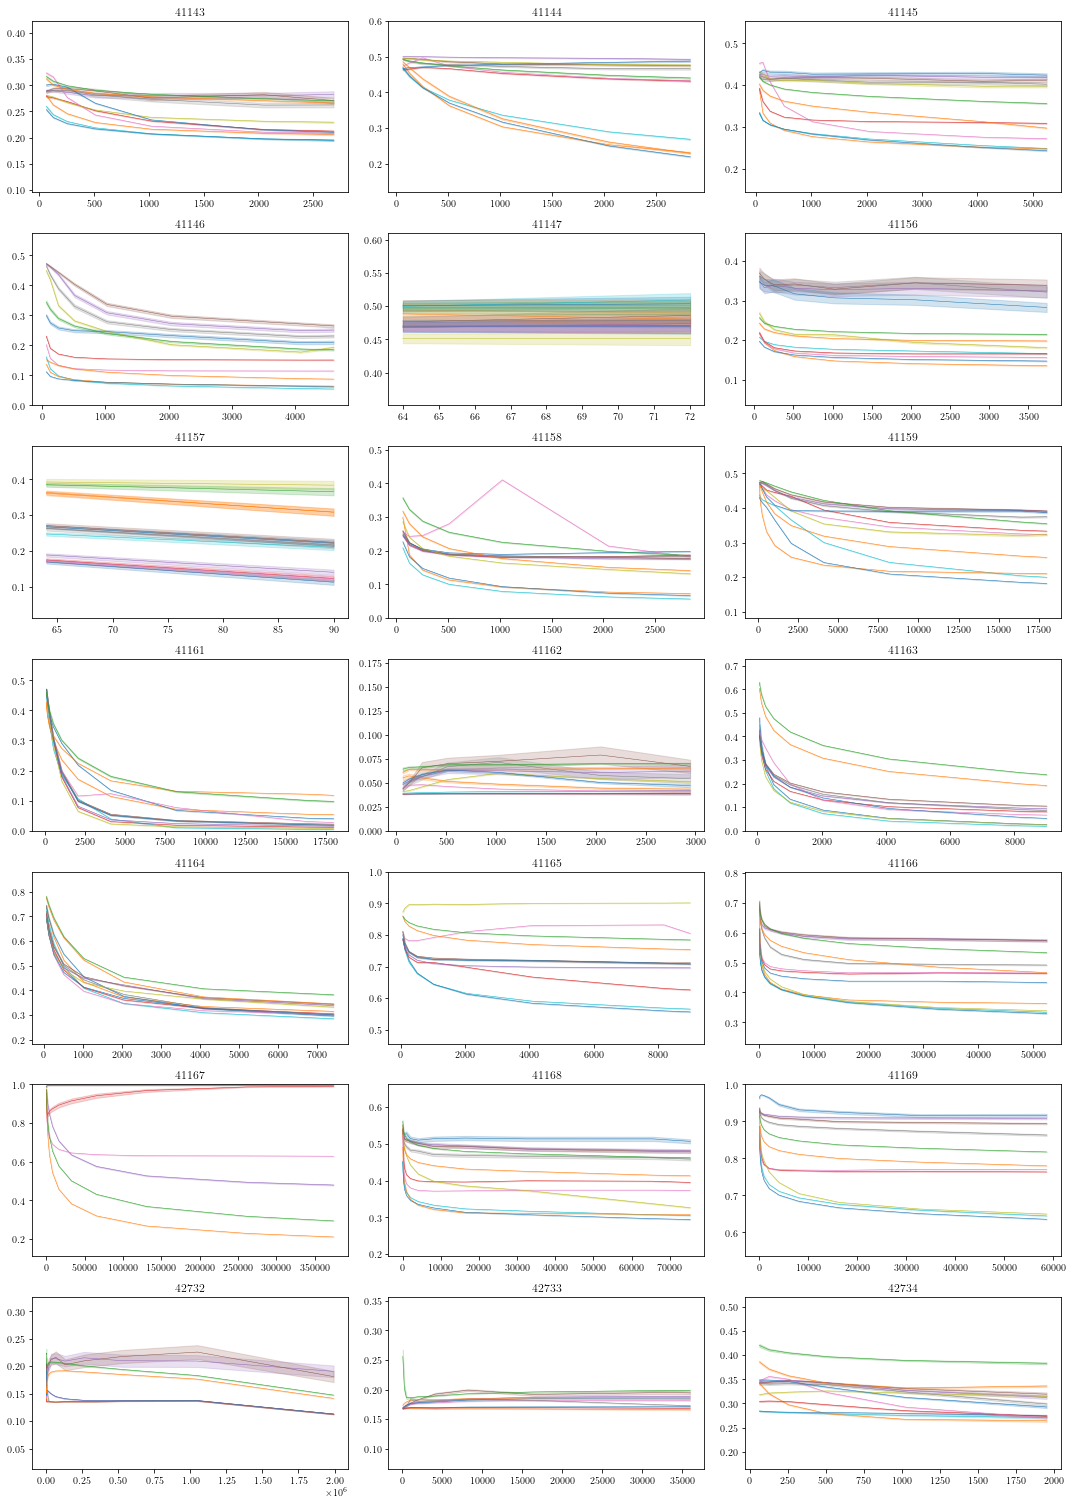

(0.8864864864864865, 656, 740)

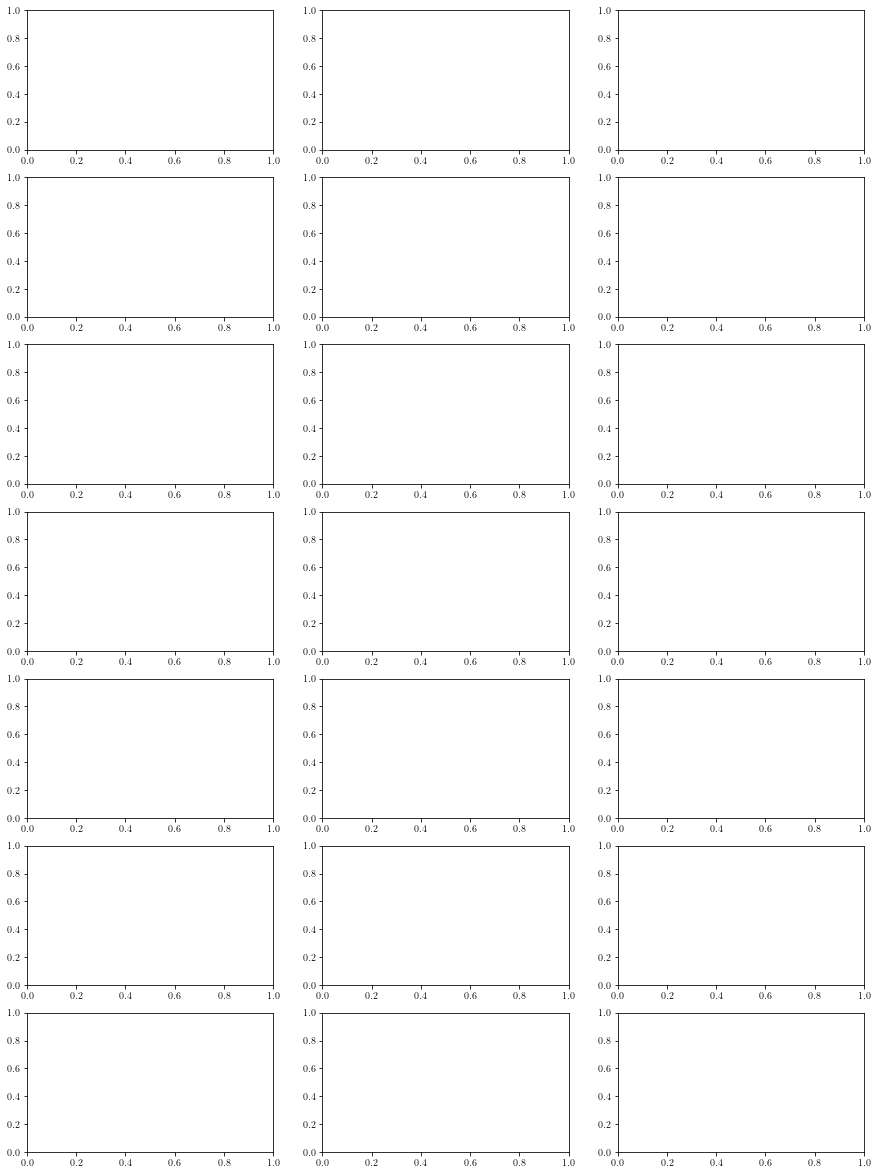

In [9]:
def plot_learning_curves(dfCache, cols=1, max_rows=10**66):
    
    algorithms = list(pd.unique(dfCache["learner"]))
    
    total_analyzed = 0
    total_convex = 0
    
    height_per_plot = 3
    datasets = pd.unique(dfCache["openmlid"])
    rows = int(np.ceil(len(datasets) / cols))
    
    num_figs = int(np.ceil(rows / max_rows))
    print("Creating " + str(num_figs) + " figures.")
    
    fig_cnt = 1
        
    fig, ax_array = plt.subplots(min(rows, max_rows), cols, figsize=(15, min(rows, max_rows) * height_per_plot))
    row = 0
    col = 0
    for openmlid, dfDataset in dfCache.groupby("openmlid"):
        #fig, ax = plt.subplots(figsize=(15, 8))
        ax = ax_array[row][col] if len(ax_array.shape) > 1 else ax_array[row]
        col += 1
        if col >= cols:
            col = 0
            row += 1
            
        max_val = 0
        min_val = 1

        #print(pd.unique(dfCache["openmlid"]))
        for learner, dfLearner in dfDataset.groupby("learner"):

            is_convex = True
            sizes = [s for s in sorted(pd.unique(dfLearner["trainsize"])) if s >= 64]
            values = []
            conf = []
            optimistic_slopes = []
            for i, size in enumerate(sizes):

                values_at_size = dfLearner[dfLearner["trainsize"] == size]["errorrate"].values
                values.append(np.mean(values_at_size))
                max_val = max(max_val, np.mean(values_at_size))
                min_val = min(min_val, np.mean(values_at_size))
                mu = np.mean(values_at_size)
                sigma = np.std(values_at_size)
                conf_at_size = scipy.stats.norm.interval(0.95, loc=mu, scale=sigma/np.sqrt(len(values_at_size)))
                conf.append(conf_at_size)

                if size >= 128:
                    optimistic_slope = (conf[i][0] - conf[i-1][1]) / (size - sizes[i-1])
                    optimistic_slopes.append(optimistic_slope)

                    if len(optimistic_slopes) >= 2 and np.round(optimistic_slope, 4) < np.round(optimistic_slopes[-2], 4):
                        print("Found non-convexity for " + str(learner) + " at size " + str(size) + " (compared to " + str(sizes[i - 1]) + "). " + str(optimistic_slopes[-2:]))
                        is_convex = False

            slope_orders = np.argsort(optimistic_slopes)
            #is_convex = all(slope_orders == list(range(len(optimistic_slopes))))

            if not is_convex:
                print("Found non-convexity for " + str(learner) + " with slopes: " + str(optimistic_slopes))
            else:
                total_convex += 1
            conf = np.array(conf)
            color = "C" + str(algorithms.index(learner))
            ax.plot(sizes, values, label=learner, color=color, linewidth=.5)
            ax.fill_between(sizes, conf[:,0], conf[:,1], alpha=0.2, color=color)


            total_analyzed += 1
        #ax.legend()
        ax.set_title(openmlid)
        ax.set_ylim([max(0, min_val - 0.1), min(1, max_val + 0.1)])
        fig.tight_layout()
    
        if row >= max_rows:
            plt.show()
            fig.savefig("plots/learningcurves_" + str(fig_cnt) + ".pdf")
            fig, ax_array = plt.subplots(min(rows, max_rows), cols, figsize=(15, min(rows, max_rows) * height_per_plot))
            row = 0
            col = 0
            fig_cnt += 1
    
    fig.savefig("plots/learningcurves_" + str(fig_cnt) + ".pdf")
            
    return total_convex/total_analyzed, total_convex, total_analyzed

plot_learning_curves(dfResults, cols = 3, max_rows = 7)

In [75]:
for trainsize, dfS in dfResults[(dfResults["openmlid"] == 4534)].groupby(["learner", "trainsize"]):
    print(trainsize, np.mean(dfS["errorrate"]))
#pd.unique(dfResults[(dfResults["runtime"] > 10000)]["openmlid"])

('sklearn.linear_model.LogisticRegression', 4) 0.3912062222222221
('sklearn.linear_model.LogisticRegression', 8) 0.2860546666666666
('sklearn.linear_model.LogisticRegression', 16) 0.19018133333333345
('sklearn.linear_model.LogisticRegression', 32) 0.13168488888888885
('sklearn.linear_model.LogisticRegression', 64) 0.1012435555555555
('sklearn.linear_model.LogisticRegression', 128) 0.08449111111111111
('sklearn.linear_model.LogisticRegression', 256) 0.07491999999999994
('sklearn.linear_model.LogisticRegression', 512) 0.06973111111111112
('sklearn.linear_model.LogisticRegression', 1024) 0.06561111111111112
('sklearn.linear_model.LogisticRegression', 2048) 0.06331618617618397
('sklearn.linear_model.LogisticRegression', 4096) 0.061632099120243915
('sklearn.linear_model.LogisticRegression', 8192) 0.060402840842938656
('sklearn.linear_model.LogisticRegression', 9949) 0.05999999999999997
('sklearn.linear_model.PassiveAggressiveClassifier', 4) 0.3481151515151515
('sklearn.linear_model.PassiveA